In [38]:
class LogRegression(object):
    """docstring for LogRegression."""
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    """You can give any required inputs to the fit()"""
    def fit(self, X, y):
        

        """Write it from scratch. Usage of sklearn is not allowed"""
        n_sam, n_feat = X.shape

        # init parameters
        self.weights = np.zeros(n_feat)
        self.bias = 0
        losslist=0
        acclist = 0
        # gradient descent
        for _ in range(self.n_iters):
          
            linear_model = np.dot(X, self.weights) + self.bias
            
            y_predicted = self._sigmoid(linear_model)

           
            dw = (1 / n_sam) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_sam) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            

            z = np.dot(X, self.weights)
            h = self._sigmoid(z)
            losslist = np.append(losslist,(self.lossf(h, y)))
            
            y_pred = self.predict(X)
            acclist= np.append(acclist,self.acc(y,y_pred))
            
        return losslist,acclist
            
            


    """ You can add as many methods according to your requirements, but training must be using fit(), and testing must be with predict()"""
    def predict(self, X):
               
        """Write it from scratch. Usage of sklearn is not allowed"""

        """Fill your code here. predict() should only take X_test and return predictions."""
        linear_model = np.dot(X, self.weights) + self.bias
        ypred = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in ypred]
        return np.array(y_predicted_cls)
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def lossf(self,h,y):
        #n = len(ypred)
        #self.loss=0
        #for i in range(n):
           # self.loss = np.append(self.loss, [-y[i]*np.log(ypred[i])-(1-y[i])*np.log(1-ypred[i])])
        #print(self.loss)
        #loss = np.mean(self.loss)
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
        #return loss    
        
    def acc(self,y,ypred):
        size=ypred.size
        count=0
        for j in range(ypred.size):
            if ypred[j]==y[j]:
                count+=1;
        return (count/ypred.size) 
            
     

       

In [34]:
def fold_split(Z):
    f = Z.shape[0]//5
    fold1=Z[:f]
    fold2=Z[f:(2*f)]
    fold3=Z[(2*f):(3*f)]
    fold4=Z[(3*f):(4*f)]
    fold5=Z[(4*f):]
    return fold1,fold2,fold3,fold4,fold5

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from pandas import DataFrame

In [36]:
#def main() :
data1 = loadmat('dataset_1.mat')
data2 = data1['samples']
mlabel = data1['labels'][0]
data3 = np.column_stack((data2,mlabel))
df = pd.DataFrame(data3)
df.columns = [0, 1,'Labels']
feature_cols = [0,1]
target = ['Labels']
X = df[feature_cols]
Y = df[target]
Xfold1,Xfold2,Xfold3,Xfold4,Xfold5 = fold_split(X)
Yfold1,Yfold2,Yfold3,Yfold4,Yfold5 = fold_split(Y)
    
    #list1=[]
    #iter = [0,200,400,600,800,1000]
    #for i in range 
    

Text(0.5, 0.98, 'For Fold 5')

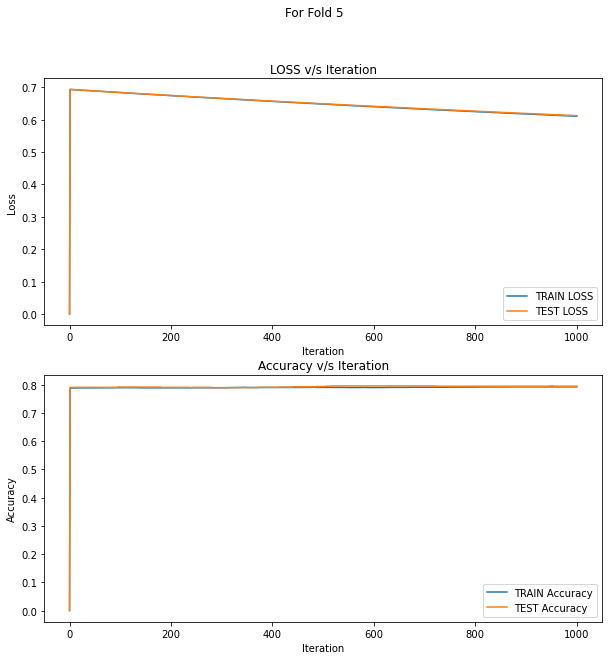

In [39]:
model1 = LogRegression(0.001,1000)
dfX1 = pd.concat([Xfold1,Xfold2,Xfold3,Xfold4], ignore_index=True)
dfY1 = pd.concat([Yfold1,Yfold2,Yfold3,Yfold4], ignore_index=True,axis=0)
dfY1 = dfY1.to_numpy().reshape(4000)
loss_trlist,accu_trlist = model1.fit(dfX1.to_numpy(), dfY1)

Y_train1 = model1.predict(dfX1.to_numpy())
Y_pred1 = model1.predict(Xfold5.to_numpy())

Y5 = Yfold5
Y5 = Y5.to_numpy().reshape(1000)
loss_tslist,accu_tslist = model1.fit(Xfold5.values,Y5)

i = np.arange(0, 1001, 1)


#np.array(losslist,dtype=float)
folddf1 = np.column_stack((i,loss_trlist,loss_tslist,accu_trlist,accu_tslist))
folddf1 = pd.DataFrame(folddf1)
folddf1.columns = [0, 1,2,3,4]
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(10)
fig.set_figwidth(10)
ax1.plot(folddf1[0],folddf1[1],label = "TRAIN LOSS") 
ax1.plot(folddf1[0],folddf1[2],label = "TEST LOSS")
ax1.set_title('LOSS v/s Iteration')    
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(folddf1[0],folddf1[3],label = "TRAIN Accuracy") 
ax2.plot(folddf1[0],folddf1[4],label = "TEST Accuracy")
ax2.set_title('Accuracy v/s Iteration')   
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Accuracy')
ax2.legend()
fig.suptitle('For Fold 5') 
    
    #loss1train = model.lossf(dfY1,Y_train1)
    #loss1test = model.lossf(Yfold5,Y_pred1)
    #acc1train = model.lossf(dfY1,Y_train1)
    #acc1test = model.lossf(Yfold5,Y_pred1)

Text(0.5, 0.98, 'For Fold 1')

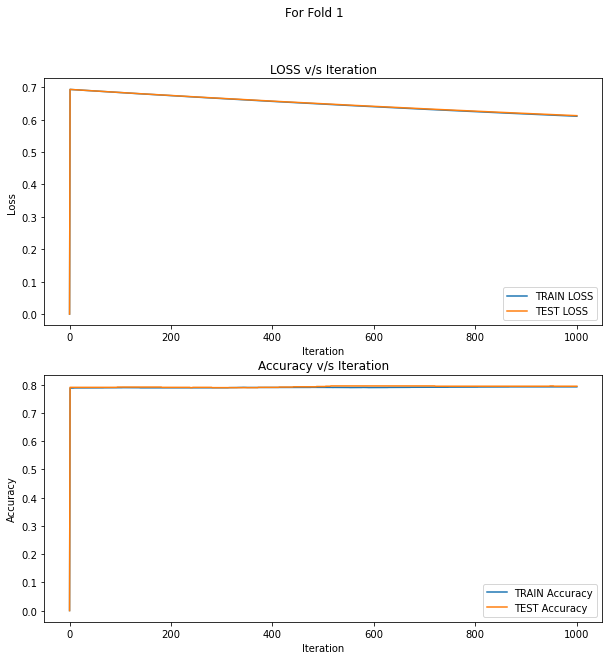

In [40]:
model2 = LogRegression(0.001,1000)
dfX2 = pd.concat([Xfold2,Xfold3,Xfold4,Xfold5], ignore_index=True)
dfY2 = pd.concat([Yfold2,Yfold3,Yfold4,Yfold5], ignore_index=True)
dfY2 = dfY2.to_numpy().reshape(4000)
loss_trlist,accu_trlist = model2.fit(dfX2.to_numpy(), dfY2)

Y_train2 = model2.predict(dfX2.to_numpy())
Y_pred2 = model2.predict(Xfold1.to_numpy())


Y1 = Yfold1
Y1 = Y1.to_numpy().reshape(1000)
loss_tslist,accu_tslist = model2.fit(Xfold1.values,Y1)

#i = np.arange(0, 1001, 1)


#np.array(losslist,dtype=float)
folddf2 = np.column_stack((i,loss_trlist,loss_tslist,accu_trlist,accu_tslist))
folddf2 = pd.DataFrame(folddf1)
folddf2.columns = [0, 1,2,3,4]
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(10)
fig.set_figwidth(10)
ax1.plot(folddf2[0],folddf2[1],label = "TRAIN LOSS") 
ax1.plot(folddf2[0],folddf2[2],label = "TEST LOSS")
ax1.set_title('LOSS v/s Iteration')    
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(folddf2[0],folddf2[3],label = "TRAIN Accuracy") 
ax2.plot(folddf2[0],folddf2[4],label = "TEST Accuracy")
ax2.set_title('Accuracy v/s Iteration')   
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Accuracy')
ax2.legend()
fig.suptitle('For Fold 1') 
#loss2train = model.lossf(dfY2,Y_train2)
#loss2test = model.lossf(Yfold1,Y_pred2)
#acc2train = model.acc(dfY2,Y_train2)
#acc2test = model.acc(Yfold1,Y_pred2)

Text(0.5, 0.98, 'For Fold 2')

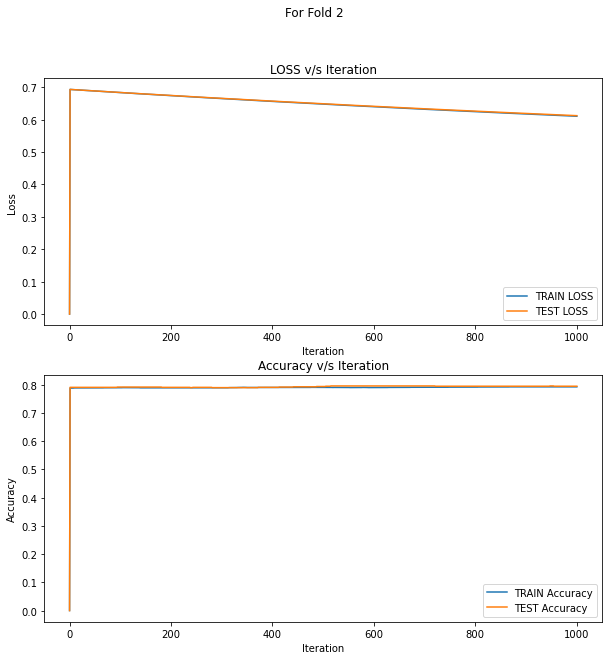

In [41]:
model3 = LogRegression(0.001,1000)
dfX3 = pd.concat([Xfold3,Xfold4,Xfold5,Xfold1], ignore_index=True)
dfY3 = pd.concat([Yfold3,Yfold4,Yfold5,Yfold1], ignore_index=True)
dfY3 = dfY3.to_numpy().reshape(4000)
loss_trlist,accu_trlist = model3.fit(dfX3.to_numpy(), dfY3)
Y_train3 = model3.predict(dfX3.to_numpy())
Y_pred3 = model3.predict(Xfold2.to_numpy())

Y2 = Yfold2
Y2 = Y2.to_numpy().reshape(1000)
loss_tslist,accu_tslist = model3.fit(Xfold2.values,Y2)

folddf3 = np.column_stack((i,loss_trlist,loss_tslist,accu_trlist,accu_tslist))
folddf3 = pd.DataFrame(folddf1)
folddf3.columns = [0, 1,2,3,4]
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(10)
fig.set_figwidth(10)
ax1.plot(folddf3[0],folddf3[1],label = "TRAIN LOSS") 
ax1.plot(folddf3[0],folddf3[2],label = "TEST LOSS")
ax1.set_title('LOSS v/s Iteration')    
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(folddf3[0],folddf3[3],label = "TRAIN Accuracy") 
ax2.plot(folddf3[0],folddf3[4],label = "TEST Accuracy")
ax2.set_title('Accuracy v/s Iteration')   
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Accuracy')
ax2.legend()
fig.suptitle('For Fold 2') 

#loss3train = model.lossf(dfY3,Y_train3)
#loss3test = model.lossf(Yfold2,Y_pred3)
#acc3train = model.acc(dfY3,Y_train3)
#acc3test = model.acc(Yfold2,Y_pred3)

Text(0.5, 0.98, 'For Fold 3')

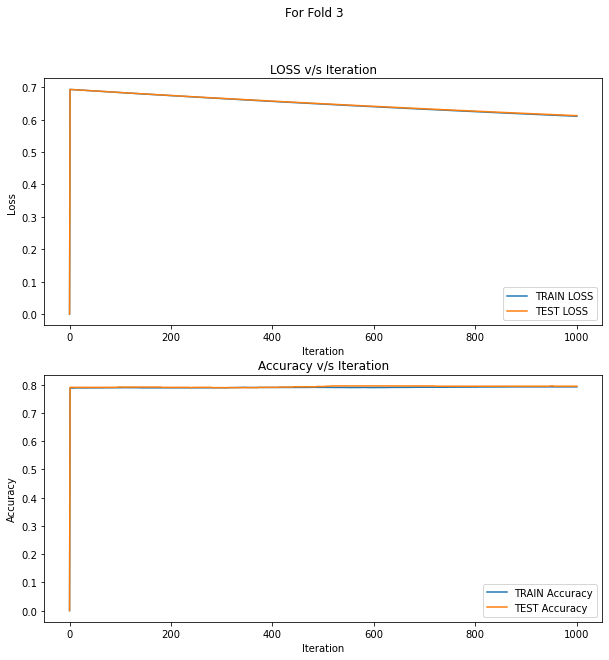

In [42]:
model4 = LogRegression(0.001,1000)
dfX4 = pd.concat([Xfold4,Xfold5,Xfold1,Xfold2], ignore_index=True)
dfY4 = pd.concat([Yfold4,Yfold5,Yfold1,Yfold2], ignore_index=True)
dfY4 = dfY4.to_numpy().reshape(4000)
loss_trlist,accu_trlist = model4.fit(dfX4.to_numpy(), dfY4) 
Y_train4 = model4.predict(dfX4.to_numpy())
Y_pred4 = model4.predict(Xfold3.to_numpy())


Y3 = Yfold3
Y3 = Y3.to_numpy().reshape(1000)
loss_tslist,accu_tslist = model3.fit(Xfold3.values,Y3)

folddf4 = np.column_stack((i,loss_trlist,loss_tslist,accu_trlist,accu_tslist))
folddf4 = pd.DataFrame(folddf1)
folddf4.columns = [0, 1,2,3,4]
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(10)
fig.set_figwidth(10)
ax1.plot(folddf4[0],folddf4[1],label = "TRAIN LOSS") 
ax1.plot(folddf4[0],folddf4[2],label = "TEST LOSS")
ax1.set_title('LOSS v/s Iteration')    
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(folddf4[0],folddf4[3],label = "TRAIN Accuracy") 
ax2.plot(folddf4[0],folddf4[4],label = "TEST Accuracy")
ax2.set_title('Accuracy v/s Iteration')   
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Accuracy')
ax2.legend()
fig.suptitle('For Fold 3')

#loss1train = model.lossf(dfY4,Y_train4)
#loss1test = model.lossf(Yfold3,Y_pred4)
#acc1train = model.acc(dfY4,Y_train4)
#acc1test = model.acc(Yfold3,Y_pred3)

Text(0.5, 0.98, 'For Fold 4')

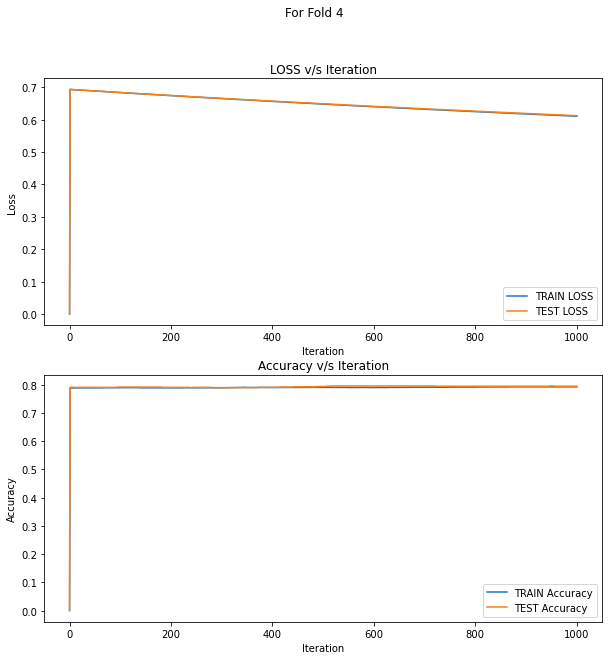

In [43]:
model5 = LogRegression(0.001,1000)   
dfX5 = pd.concat([Xfold5,Xfold1,Xfold2,Xfold3], ignore_index=True)
dfY5 = pd.concat([Yfold5,Yfold1,Yfold2,Yfold3], ignore_index=True)
dfY5 = dfY5.to_numpy().reshape(4000)
loss_trlist,accu_trlist = model5.fit(dfX5.to_numpy(), dfY5)  
Y_train5 = model5.predict(dfX5.to_numpy())
Y_pred5 = model5.predict(Xfold4.to_numpy())

Y4 = Yfold4
Y4 = Y4.to_numpy().reshape(1000)
loss_tslist,accu_tslist = model4.fit(Xfold4.values,Y4)

folddf5 = np.column_stack((i,loss_trlist,loss_tslist,accu_trlist,accu_tslist))
folddf5 = pd.DataFrame(folddf1)
folddf5.columns = [0, 1,2,3,4]
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(10)
fig.set_figwidth(10)
ax1.plot(folddf5[0],folddf5[1],label = "TRAIN LOSS") 
ax1.plot(folddf5[0],folddf5[2],label = "TEST LOSS")
ax1.set_title('LOSS v/s Iteration')    
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(folddf5[0],folddf5[3],label = "TRAIN Accuracy") 
ax2.plot(folddf5[0],folddf5[4],label = "TEST Accuracy")
ax2.set_title('Accuracy v/s Iteration')   
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Accuracy')
ax2.legend()
fig.suptitle('For Fold 4')
#loss1train = model.lossf(dfY5,Y_train5)
#loss1test = model.lossf(Yfold4,Y_pred5)
#acc1train = model.acc(dfY5,Y_train5)
#acc1test = model.acc(Yfold4,Y_pred5)


In [48]:
list2=[]  
from sklearn import metrics
list2.append((5,metrics.accuracy_score(Y_train1, dfY1),metrics.accuracy_score(Y_pred1, Yfold5)))
list2.append((1,metrics.accuracy_score(Y_train2, dfY2),metrics.accuracy_score(Y_pred2, Yfold1)))
list2.append((2,metrics.accuracy_score(Y_train3, dfY3),metrics.accuracy_score(Y_pred3, Yfold2)))
list2.append((3,metrics.accuracy_score(Y_train4, dfY4),metrics.accuracy_score(Y_pred4, Yfold3)))
list2.append((4,metrics.accuracy_score(Y_train5, dfY5),metrics.accuracy_score(Y_pred5, Yfold4)))
        
df2 = DataFrame(list2,columns=['Fold','Train Accuracy','Test Accuracy'])
print(df2)
    
    
    
    
    
    
    

   Fold  Train Accuracy  Test Accuracy
0     5         0.79275          0.793
1     1         0.79325          0.805
2     2         0.79700          0.770
3     3         0.79225          0.795
4     4         0.79075          0.804
